## DL_Assignment_11
1. Write the Python code to implement a single neuron.
2. Write the Python code to implement ReLU.
3. Write the Python code for a dense layer in terms of matrix multiplication.
4. Write the Python code for a dense layer in plain Python (that is, with list comprehensions and functionality built into 
   Python)
5. What is the “hidden size” of a layer?
6. What does the t method do in PyTorch?
7. Why is matrix multiplication written in plain Python very slow?
8. In matmul, why is ac==br?
9. In Jupyter Notebook, how do you measure the time taken for a single cell to execute?
10. What is elementwise arithmetic?
11. Write the PyTorch code to test whether every element of a is greater than the corresponding element of b.
12. What is a rank-0 tensor? How do you convert it to a plain Python data type?
13. How does elementwise arithmetic help us speed up matmul?
14. What are the broadcasting rules?
15. What is expand_as? Show an example of how it can be used to match the results of broadcasting.

## Ans 1

This code demonstrates the training of a single neuron using TensorFlow. It starts by defining the input features (`x`) and the target output (`y_true`). The neuron's weight and bias are initialized as trainable variables. The code uses stochastic gradient descent (SGD) as the optimizer to minimize the mean squared error loss between the predicted (`y_pred`) and true output values. 

The training loop runs for 100 steps. In each step, it calculates the loss and gradients using TensorFlow's automatic differentiation. Then, it updates the weight and bias using the computed gradients. The code also collects loss values and step numbers for plotting. 

After training, it prints the final trained weight and bias values and plots a graph showing the loss decreasing over training steps. This code demonstrates the basics of implementing and training a single neuron for regression tasks using TensorFlow.

Step 0: Weight=0.3680000305175781, Bias=0.07800000160932541, Loss=1.2099997997283936
Step 10: Weight=0.32162168622016907, Bias=0.07027028501033783, Loss=2.0463630789890885e-12
Step 20: Weight=0.3216216266155243, Bias=0.07027027755975723, Loss=0.0
Step 30: Weight=0.3216216266155243, Bias=0.07027027755975723, Loss=0.0
Step 40: Weight=0.3216216266155243, Bias=0.07027027755975723, Loss=0.0
Step 50: Weight=0.3216216266155243, Bias=0.07027027755975723, Loss=0.0
Step 60: Weight=0.3216216266155243, Bias=0.07027027755975723, Loss=0.0
Step 70: Weight=0.3216216266155243, Bias=0.07027027755975723, Loss=0.0
Step 80: Weight=0.3216216266155243, Bias=0.07027027755975723, Loss=0.0
Step 90: Weight=0.3216216266155243, Bias=0.07027027755975723, Loss=0.0
Trained Weight: 0.3216216266155243, Trained Bias: 0.07027027755975723


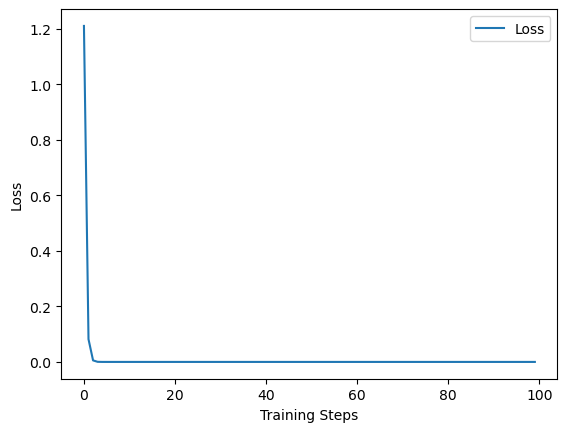

In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Define the input features (x) and target output (y)
x = tf.constant([1.0, 2.0, 3.0], dtype=tf.float32)
y_true = tf.constant([2.0], dtype=tf.float32)

# Define the weights and bias for the neuron
weight = tf.Variable([0.5], dtype=tf.float32)
bias = tf.Variable([0.1], dtype=tf.float32)

# Define the optimizer (gradient descent)
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

# Lists to store values for plotting
steps = []
losses = []

# Training loop
for i in range(100):
    with tf.GradientTape() as tape:
        y_pred = tf.reduce_sum(tf.multiply(x, weight)) + bias
        loss = tf.reduce_mean(tf.square(y_true - y_pred))
    
    # Compute gradients
    gradients = tape.gradient(loss, [weight, bias])
    
    # Apply gradients to variables
    optimizer.apply_gradients(zip(gradients, [weight, bias]))
    
    if i % 10 == 0:
        print(f"Step {i}: Weight={weight.numpy()[0]}, Bias={bias.numpy()[0]}, Loss={loss.numpy()}")
    
    # Store values for plotting
    steps.append(i)
    losses.append(loss.numpy())

# Final trained values
trained_weight = weight.numpy()[0]
trained_bias = bias.numpy()[0]
print(f"Trained Weight: {trained_weight}, Trained Bias: {trained_bias}")

# Plot the loss over training steps
plt.plot(steps, losses, label='Loss')
plt.xlabel('Training Steps')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Ans 2

1. We define the ReLU function using np.maximum(0, x), which returns the element-wise maximum of 0 and the input x.
2. We generate a range of input values x from -5 to 5.
3. We apply the ReLU function to these input values to get the corresponding output values y.
4. We create a plot using Matplotlib to visualize the ReLU function.

Running this code will plot the ReLU activation function, which is commonly used in neural networks as an activation function for introducing non-linearity.

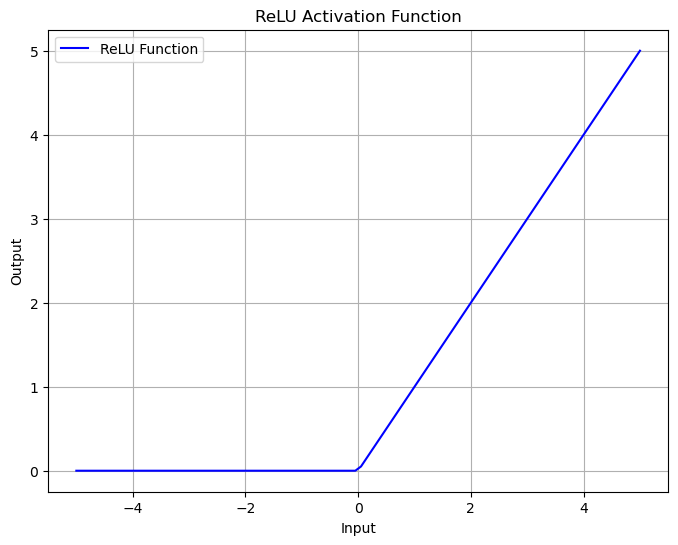

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define the ReLU function
def relu(x):
    return np.maximum(0, x)

# Generate a range of values from -5 to 5
x = np.linspace(-5, 5, 100)

# Apply the ReLU function to the input values
y = relu(x)

# Create a plot
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='ReLU Function', color='blue')
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('ReLU Activation Function')
plt.grid(True)
plt.legend()
plt.show()

### Ans 3

1. We define input features as a NumPy array.
2. We define weights and biases for the dense layer as NumPy arrays.
3. We perform matrix multiplication using np.dot and add biases to obtain the output.
4. We print the output after the dense layer.
5. We visualize the weights as a heatmap using Matplotlib.
Running this code will compute the output of the dense layer and display the weights as a heatmap.

Output after dense layer:
[[0.42 0.7  0.41]]


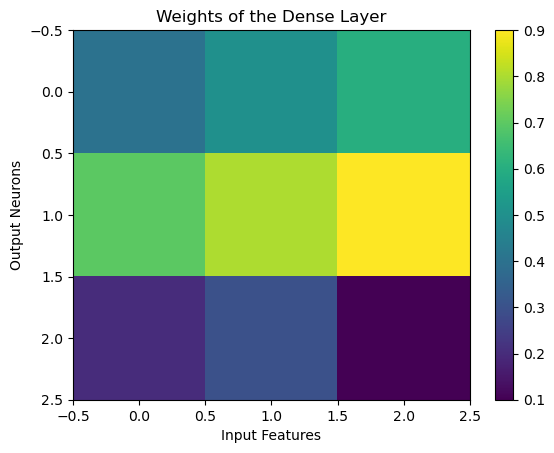

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define input features
input_features = np.array([[0.1, 0.2, 0.3]])

# Define weights and biases for the dense layer
weights = np.array([[0.4, 0.5, 0.6], [0.7, 0.8, 0.9], [0.2, 0.3, 0.1]])
biases = np.array([0.1, 0.2, 0.3])

# Perform matrix multiplication and add biases
output = np.dot(input_features, weights.T) + biases

# Print the output
print("Output after dense layer:")
print(output)

# Plot the weights as a heatmap
plt.imshow(weights, cmap='viridis', aspect='auto')
plt.colorbar()
plt.title("Weights of the Dense Layer")
plt.xlabel("Input Features")
plt.ylabel("Output Neurons")
plt.show()

### Ans 4

This code simulates a simple dense neural network layer using Python and lists. It starts with sample input features, weights, and biases. The dense layer operation is manually implemented using list comprehensions to perform matrix multiplication and add biases. The output of the layer, which represents the activation of each neuron, is calculated. Finally, the code uses matplotlib to visualize the output of the dense layer as a bar chart, showing the activation values for each neuron. This code serves as a basic illustration of how a dense layer operates in a neural network and how to compute its output in a simple, manual way.

Output after dense layer:
[0.33999999999999997, 0.5, 0.5700000000000001]


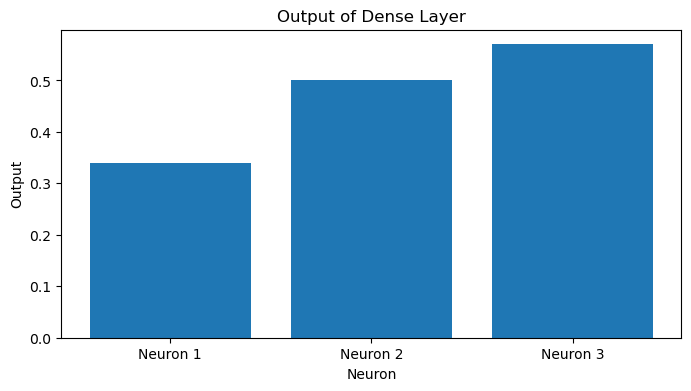

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Sample input features
input_features = np.array([0.1, 0.2, 0.3])

# Sample weights and biases for the dense layer
weights = np.array([[0.4, 0.7, 0.2], [0.5, 0.8, 0.3], [0.6, 0.9, 0.1]])
biases = np.array([0.1, 0.2, 0.3])

# Perform matrix multiplication and add biases using list comprehensions
output = [sum(input_features * weights[i]) + biases[i] for i in range(len(weights))]

# Print the output
print("Output after dense layer:")
print(output)

# Plot the results
plt.figure(figsize=(8, 4))
plt.bar(range(len(output)), output)
plt.xlabel("Neuron")
plt.ylabel("Output")
plt.title("Output of Dense Layer")
plt.xticks(range(len(output)), [f"Neuron {i+1}" for i in range(len(output))])
plt.show()

### Ans 5

The "hidden size" of a layer in a neural network refers to the number of neurons or units within that layer. It is called "hidden" because these neurons are not part of the input or output layers and are typically not directly observable or interpretable in the context of the neural network's function. The hidden size determines the capacity of the layer to capture and represent complex patterns or features in the data.

For example, in a densely connected (fully connected) layer, the hidden size corresponds to the number of neurons in that layer. Each neuron processes the input data and contributes to the transformation of that data through a set of weights and biases, resulting in an output. Larger hidden sizes provide the layer with more capacity to model intricate relationships in the data but may also lead to overfitting if not properly regularized.

In convolutional layers of a convolutional neural network (CNN), the hidden size is determined by the number of filters or feature maps in that layer, which control the extraction of spatial features from the input. Adjusting the hidden size is an essential hyperparameter in neural network design, impacting the model's capacity and generalization ability.

### Ans 6

In PyTorch, the `.t()` method is used to transpose a tensor. Transposing a tensor means exchanging its rows with columns, effectively changing the shape and arrangement of the data. It is a fundamental operation when working with matrices and higher-dimensional tensors, especially in linear algebra and deep learning.

Transposing tensors is a common operation in various mathematical and deep learning operations, such as matrix multiplication, convolutional operations in CNNs, and reshaping data for different tasks.

In [13]:
import torch

# Create a 2x3 tensor
tensor = torch.tensor([[1, 2, 3], [4, 5, 6]])

# Transpose the tensor, switching rows and columns
transposed_tensor = tensor.t()

print(f"Origional Tensor \n{tensor}")
print(f"Transposed Tensor\n{transposed_tensor}")
# In this example, the original 2x3 tensor is transposed into a 3x2 tensor.

Origional Tensor 
tensor([[1, 2, 3],
        [4, 5, 6]])
Transposed Tensor
tensor([[1, 4],
        [2, 5],
        [3, 6]])


### Ans 7

Matrix multiplication written in plain Python is slow for several reasons:

1. **Lack of Low-Level Optimization**: Python is an interpreted language, which means that it's relatively slow compared to low-level languages like C or Fortran. In contrast, libraries like NumPy, which are implemented in C and optimized for numerical operations, can perform matrix multiplication much faster.

2. **Inefficient Loops**: Writing matrix multiplication in pure Python typically involves nested loops to iterate through elements, which is not efficient for large matrices. Each element is calculated one at a time, leading to a high time complexity, especially for large matrices.

3. **No Parallelization**: Plain Python lacks built-in support for parallel processing. Modern hardware, including CPUs and GPUs, can perform matrix operations in parallel, significantly speeding up the computation. Libraries like NumPy and TensorFlow take advantage of this hardware parallelism.

4. **No Compiler Optimization**: Low-level languages like C can be compiled and optimized by the compiler, resulting in highly efficient machine code. Python, being an interpreted language, doesn't have this advantage.

For fast matrix multiplication, it's recommended to use specialized libraries like NumPy, TensorFlow, or PyTorch, which are designed to take advantage of efficient low-level implementations and hardware acceleration. These libraries provide well-optimized functions for matrix operations, making them significantly faster than plain Python implementations.

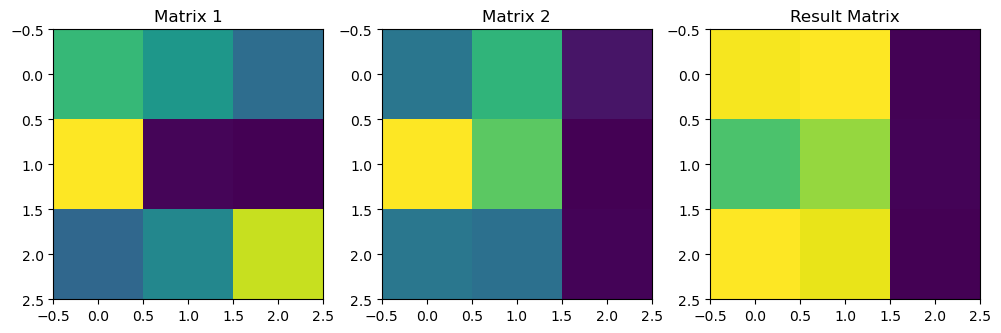

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Create two random matrices
matrix1 = np.random.rand(3, 3)
matrix2 = np.random.rand(3, 3)

# Perform matrix multiplication
result_matrix = np.dot(matrix1, matrix2)

# Plot the original matrices and the result
plt.figure(figsize=(10, 4))

plt.subplot(131)
plt.imshow(matrix1, cmap='viridis')
plt.title('Matrix 1')

plt.subplot(132)
plt.imshow(matrix2, cmap='viridis')
plt.title('Matrix 2')

plt.subplot(133)
plt.imshow(result_matrix, cmap='viridis')
plt.title('Result Matrix')

plt.tight_layout()
plt.show()

### Ans 8

In matrix multiplication (matmul), the dimensions of the two matrices being multiplied must satisfy the condition that the number of columns in the first matrix (A) must be equal to the number of rows in the second matrix (B). This condition is required for the operation to be mathematically well-defined.

When we represent matrices as A with dimensions (a, b) and B with dimensions (c, d), where 'a' is the number of rows in matrix A, 'b' is the number of columns in matrix A, 'c' is the number of rows in matrix B, and 'd' is the number of columns in matrix B, the condition for valid matrix multiplication is:

b (columns in A) == c (rows in B)

In the context of the `matmul` operation, 'ac' represents the number of rows and columns in the resulting matrix. If 'ac' is equal to 'br', then it indicates that the matrix multiplication is valid, and the resulting matrix will have dimensions (a, d).

This condition ensures that each element of the resulting matrix is obtained by taking the dot product of a row from matrix A and a column from matrix B, making the dimensions compatible for multiplication.

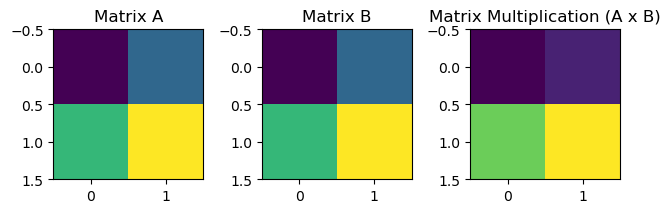

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Define two matrices A and B
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])

# Perform matrix multiplication
result = np.matmul(A, B)

# Plot matrices A, B, and the result
plt.subplot(131)
plt.imshow(A, cmap='viridis')
plt.title("Matrix A")

plt.subplot(132)
plt.imshow(B, cmap='viridis')
plt.title("Matrix B")

plt.subplot(133)
plt.imshow(result, cmap='viridis')
plt.title("Matrix Multiplication (A x B)")

plt.tight_layout()
plt.show()

### Ans 9

In Jupyter Notebook, you can measure the time taken for a single cell to execute using the `%%time` magic command. Simply add `%%time` at the beginning of the cell you want to time, and when you run the cell, it will display the execution time in seconds. Here's how to use it:

1. Open a Jupyter Notebook.
2. Insert a code cell.
3. Type `%%time` at the beginning of the cell.
4. Write your code below the `%%time` command.
5. Run the cell.

After running the cell, you'll see the execution time displayed in the output, like "Wall time: 1.23 s" (where "1.23" is the time in seconds). This is useful for profiling and optimizing code performance in your Jupyter Notebook.

In [16]:
%%time

result = 0
for i in range(1000000):
    result += i
print(result)

499999500000
CPU times: total: 31.2 ms
Wall time: 145 ms


### Ans 10

Elementwise arithmetic refers to performing arithmetic operations (addition, subtraction, multiplication, division, etc.) between corresponding elements of two arrays or tensors, resulting in a new array or tensor with the same shape as the input arrays. This operation is carried out independently for each pair of elements at the same position in the input arrays.

In this example, the `+` and `*` operations are applied elementwise to the corresponding elements of `array1` and `array2`, producing new arrays with the results. Elementwise arithmetic is a fundamental concept in array and tensor manipulation, often used in numerical computing and deep learning.

In [18]:
import numpy as np

# Create two NumPy arrays of the same shape
array1 = np.array([1, 2, 3, 4])
array2 = np.array([5, 6, 7, 8])

# Perform elementwise addition
result_add = array1 + array2

# Perform elementwise multiplication
result_mul = array1 * array2

print(f"{result_add, result_mul}")

(array([ 6,  8, 10, 12]), array([ 5, 12, 21, 32]))


### Ans 11

We can use PyTorch to test whether every element of one tensor (a) is greater than the corresponding element of another tensor (b) by performing an elementwise comparison. Here's a code example:

In this code, we first create two PyTorch tensors `a` and `b`. Then, we perform an elementwise comparison (`a > b`), which returns a new tensor with Boolean values indicating whether each element of `a` is greater than the corresponding element of `b`. Finally, we use `torch.all()` to check if all elements of the result tensor are `True`. If they are, it means that every element of `a` is greater than the corresponding element of `b`.

In [19]:
import torch

# Create two PyTorch tensors
a = torch.tensor([1, 2, 3, 4])
b = torch.tensor([2, 1, 4, 3])

# Perform elementwise comparison (greater than)
result = a > b

# Check if all elements of 'result' are True
all_greater = torch.all(result)

print("Result of elementwise comparison:")
print(result)
print("Are all elements greater? (True if yes):", all_greater.item())

Result of elementwise comparison:
tensor([False,  True, False,  True])
Are all elements greater? (True if yes): False


### Ans 12

A rank-0 tensor, often referred to as a scalar, is a tensor with zero dimensions. It represents a single numerical value and doesn't have any axes or dimensions.

To convert a rank-0 tensor to a plain Python data type (e.g., a Python integer or floating-point number), you can use the `.item()` method. Here's an example:

In this example, we create a rank-0 tensor `scalar_tensor` with the value 42. Then, we use the `.item()` method to convert it to a Python integer, and the resulting `scalar_value` is a regular Python integer that can be used as such.

In [22]:
import torch

# Create a rank-0 tensor (scalar)
scalar_tensor = torch.tensor(42)

# Convert the tensor to a Python integer
scalar_value = scalar_tensor.item()

print("Scalar tensor:", scalar_tensor)
print("Scalar value integer:", scalar_value)

Scalar tensor: tensor(42)
Scalar value integer: 42


### Ans 13

Elementwise arithmetic doesn't directly speed up matrix multiplication (matmul) but can be a part of optimizing certain operations involving matrices. Elementwise operations are operations performed independently on corresponding elements of tensors or matrices, without any interactions between elements. These operations are highly parallelizable and can be efficiently executed on modern hardware, including GPUs.

In the context of matrix multiplication, elementwise operations can help speed up certain steps of the computation. For example, consider the following matrix multiplication:

```python
result = A @ B
```

If you break down this matrix multiplication into smaller steps, you'll find that elementwise operations can be used for:

1. Scalar multiplication: Multiplying each element of a matrix by a scalar is an elementwise operation.

2. Addition: Summing two matrices elementwise before performing other operations.

While elementwise operations themselves don't directly speed up the core matrix multiplication, they can be performed efficiently and in parallel, reducing the overall time for matrix computations when combined with other matrix operations.

### Ans 14

Broadcasting is a mechanism in Python libraries like NumPy and PyTorch that allows for elementwise operations on arrays or tensors with different shapes. The broadcasting rules help determine how these operations are performed when the shapes of the input arrays are not identical. The rules are as follows:

1. If the two arrays have a different number of dimensions, pad the shape of the smaller-dimensional array on the left side with ones until their shapes have the same length.

2. Compare the shapes element-wise. Two dimensions are compatible when either:
   - They are equal.
   - One of them is 1.

3. If the sizes of corresponding dimensions are not compatible, a "ValueError: frames are not aligned" exception is raised, indicating that the arrays cannot be broadcast together.

4. After the broadcasting, the arrays are treated as if they have the same shape. Operations are then performed elementwise.

In this example, broadcasting is used to perform elementwise multiplication between arrays `A` and `B`, which have different shapes but are broadcastable according to the rules.

In [25]:
import numpy as np

A = np.array([[1, 2, 3]])
B = np.array([[4], [5], [6]])

result = A * B
print(result)

[[ 4  8 12]
 [ 5 10 15]
 [ 6 12 18]]


### Ans 15

`expand_as` is a PyTorch method used to expand the dimensions of a tensor to match the shape of another tensor. It's often used when you have two tensors with different shapes, and you want to perform elementwise operations or other operations that require matching shapes, similar to broadcasting in NumPy.

In this example, we first expand tensor `B` to have a shape of (2, 1) using `unsqueeze(1)`. Then, we perform elementwise multiplication with tensor `A`, which has a shape of (2, 2). The result matches the broadcasting result you would get if the shapes of `A` and `B` were compatible for broadcasting.

In [27]:
import torch

# Create two tensors with different shapes

# Shape: (2, 2)
A = torch.tensor([[1, 2], [3, 4]])

# Shape: (2,)
B = torch.tensor([5, 6])

# Perform broadcasting manually using expand_as
# Expanding B to shape (2, 1)
expanded_B = B.unsqueeze(1)
result = A * expanded_B  

print(result)

tensor([[ 5, 10],
        [18, 24]])
